In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. CEAデータベースの使用方法(例)

## 1.1 モジュールのimport

In [2]:
import os
from cea_post import Read_datset

## 1.2 インスタンス化

In [3]:
CASANAME = "sample" # 生成したデータベースのケース名（csv_databaseを格納しているフォルダの名前）

DBPATH = os.path.join("cea_db", CASANAME, "csv_database")
read = Read_datset(DBPATH)

## 1.3 データベースを基に補間値を返す関数(O/F, Pc を引数とする)を生成

In [4]:
PARAM = "CSTAR" # 補間関数を出力したいパラメータの名前 (csv_database内の *.csv ファイルの名前)

func_interp = read.gen_func(PARAM)

read.get_flist() # なおc* 以外も指定可.　"PARAM"に指定できるパラメータのリストを出力

['CF',
 'CONDUCTIVITY_c',
 'CONDUCTIVITY_e',
 'CONDUCTIVITY_t',
 'Cp_c',
 'Cp_e',
 'Cp_t',
 'CSTAR',
 'GAMMAs_c',
 'GAMMAs_e',
 'GAMMAs_t',
 'G_c',
 'G_e',
 'G_t',
 'H_c',
 'H_e',
 'H_t',
 'Isp',
 'Ivac',
 'MACH_c',
 'MACH_e',
 'MACH_t',
 'M_c',
 'M_e',
 'M_t',
 'PRANDTL_c',
 'PRANDTL_e',
 'PRANDTL_t',
 'P_c',
 'P_e',
 'P_t',
 'RHO_c',
 'RHO_e',
 'RHO_t',
 'SON_c',
 'SON_e',
 'SON_t',
 'S_c',
 'S_e',
 'S_t',
 'T_c',
 'T_e',
 'T_t',
 'U_c',
 'U_e',
 'U_t',
 'VISC_c',
 'VISC_e',
 'VISC_t',
 'MoleFraction@Chamber\\C2H6',
 'MoleFraction@Chamber\\CH4',
 'MoleFraction@Chamber\\CO',
 'MoleFraction@Chamber\\CO2',
 'MoleFraction@Chamber\\H',
 'MoleFraction@Chamber\\H2',
 'MoleFraction@Chamber\\H2O',
 'MoleFraction@Chamber\\OH',
 'MoleFraction@Exit\\C2H6',
 'MoleFraction@Exit\\CH4',
 'MoleFraction@Exit\\CO',
 'MoleFraction@Exit\\CO2',
 'MoleFraction@Exit\\H',
 'MoleFraction@Exit\\H2',
 'MoleFraction@Exit\\H2O',
 'MoleFraction@Exit\\OH',
 'MoleFraction@Throat\\C2H6',
 'MoleFraction@Throat\\CH4',


## 1.4 補間値の出力

1687.7000000000003


Text(0, 0.5, 'Chamber Pressure $P_c$ [MPa]')

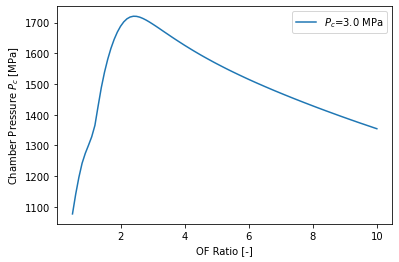

In [5]:
of = 2.0        # oxidizer to fuel ratio, OF ratio
pc = 3.0e+6     # chamber pressure [Pa], !Note! the unit is [Pa], not [MPa] 
value = func_interp(of, pc) # 補間値出力
print( value ) # 表示



# 補間関数の簡単な使用例: c* v.s. O/F のグラフ
of_array = np.arange(0.5, 10.1, 0.1)
plt.plot(of_array, np.array([func_interp(of, pc) for of in of_array]), label="$P_c$={} MPa".format(pc*1e-6))
plt.legend()
plt.xlabel("OF Ratio [-]")
plt.ylabel("Chamber Pressure $P_c$ [MPa]")

# 2. 計算条件毎に毎回CEAを実行する方法

## 2.1 モジュールのインポートとインスタンス化

In [6]:
from cea_exe import CEA_onetime_execute as cexe
obj = cexe()

## 2.2　各化学種の割合を指定する場合

### 2.2.1 入力パラメータの設定

In [7]:
## 平衡オプションの指定
OPTION = "equilibrium"      # 全域平衡計算
OPTION = "frozen nfz=1"     # 燃焼器末端以降凍結
OPTION = "frozen nfz=2"     # スロート以降凍結

## 化学種リストの設定
LIST_SPECIES = [
                {"name": "N2O", "wt": 40, "temp": 280, "h": "", "elem": ""},
                {"name": "CurableResin", "wt": 40, "temp": 280, "h": -296.9636, "elem": "C 16.0873 H 20.6143 O 3.96810"},
                {"name": "N2", "wt": 20, "temp": 280, "h": "", "elem": ""}
                ]

## 燃焼室圧力[Pa]の指定
PC = 1.0e+6

## ノズル開口比の指定
EPS = 1.0

### 2.2.2 CEAの実行

In [8]:
RESULT = obj.onetime_exe_name(OPTION, LIST_SPECIES, PC, EPS)
print(RESULT)

{'cond': {'O/F': 0.0, 'Pc': 1.0, 'PHI': 0.0}, 'therm': {'P': [1.0, 0.5546, 0.5546], 'T': [1516.51, 1348.14, 1348.14], 'RHO': [1.7361, 1.0871, 1.0871], 'H': [303.45, -16.205, -16.205], 'U': [-272.55, -526.42, -526.42], 'G': [-15000.1, -13620.6, -13620.6], 'S': [10.0913, 10.0913, 10.0913], 'M': [21.891, 21.97, 21.97], 'Cp': [1.9424, 2.1322, 1.7389], 'GAMMAs': [1.2617, 1.253, 1.2782], 'SON': [852.5, 799.6, 807.6], 'MACH': [0.0, 1.0, 0.99]}, 'trans': {'VISC': [0.53501, 0.49557, 0.49557], 'CONDUCTIVITY': [1.7482, 1.5823, 1.5823], 'PRANDTL': [0.5344, 0.5372, 0.5372]}, 'rock': {'CSTAR': [1150.5, 1150.5], 'CF': [0.695, 0.695], 'Ivac': [1437.7, 1437.7], 'Isp': [799.6, 799.6]}, 'mole': {'CO2': [0.00275, 0.2688, 0.00142], 'H2O': [0.00011, 0.26691, 0.00275], 'C(gr)': [5e-05, 0.3006, 0.15661]}}


### 2.2.3 結果の表示

In [9]:
print("特性排気速度: c*={} m/s".format(RESULT["rock"]["CSTAR"][0]))
print("\n計算条件\n", RESULT["cond"])
print("\n熱力学パラメータ\n", RESULT["therm"])
print("\n熱輸送パラメータ\n", RESULT["trans"])
print("\nロケットパラメータ\n", RESULT["rock"])
print("\nモル分率\n", RESULT["mole"])

特性排気速度: c*=1150.5 m/s

計算条件
 {'O/F': 0.0, 'Pc': 1.0, 'PHI': 0.0}

熱力学パラメータ
 {'P': [1.0, 0.5546, 0.5546], 'T': [1516.51, 1348.14, 1348.14], 'RHO': [1.7361, 1.0871, 1.0871], 'H': [303.45, -16.205, -16.205], 'U': [-272.55, -526.42, -526.42], 'G': [-15000.1, -13620.6, -13620.6], 'S': [10.0913, 10.0913, 10.0913], 'M': [21.891, 21.97, 21.97], 'Cp': [1.9424, 2.1322, 1.7389], 'GAMMAs': [1.2617, 1.253, 1.2782], 'SON': [852.5, 799.6, 807.6], 'MACH': [0.0, 1.0, 0.99]}

熱輸送パラメータ
 {'VISC': [0.53501, 0.49557, 0.49557], 'CONDUCTIVITY': [1.7482, 1.5823, 1.5823], 'PRANDTL': [0.5344, 0.5372, 0.5372]}

ロケットパラメータ
 {'CSTAR': [1150.5, 1150.5], 'CF': [0.695, 0.695], 'Ivac': [1437.7, 1437.7], 'Isp': [799.6, 799.6]}

モル分率
 {'CO2': [0.00275, 0.2688, 0.00142], 'H2O': [0.00011, 0.26691, 0.00275], 'C(gr)': [5e-05, 0.3006, 0.15661]}


## 2.3 O/Fのみで化学種の割合を指定する場合

### 2.3.1 入力パラメータの設定

In [13]:
## 平衡オプションの指定
OPTION = "equilibrium"      # 全域平衡計算
OPTION = "frozen nfz=1"     # 燃焼器末端以降凍結
OPTION = "frozen nfz=2"     # スロート以降凍結

## 化学種リストの設定
OXID_SPECIES = [
                {"name": "N2O", "wt": 40, "temp": 280, "h": "", "elem": ""},
                {"name": "O2", "wt": 60, "temp": 280, "h": "", "elem": ""}
               ]
FUEL_SPECIES = [
                {"name": "CurableResin", "wt": 40, "temp": 280, "h": -296.9636, "elem": "C 16.0873 H 20.6143 O 3.96810"},
                {"name": "NH3", "wt": 60, "temp": 280, "h": "", "elem": ""}
               ]

## 無視する化学種の指定
KWARGS= {"list_omit": ["C(gr)"]}

## 燃焼室圧力[Pa]の指定
PC = 1.0e+6

## ノズル開口比の指定
EPS = 1.0

## O/F
OF = 3.0

### 2.3.2 CEAの実行

In [14]:
RESULT = obj.onetime_exe_of(OPTION, OF, PC, OXID_SPECIES, FUEL_SPECIES, EPS, **KWARGS)
print(RESULT)

{'cond': {'O/F': 3.0, 'Pc': 1.0, 'PHI': 0.775311}, 'therm': {'P': [1.0, 0.5796, 0.5796], 'T': [3136.29, 2987.5, 2987.5], 'RHO': [0.9406100000000001, 0.57937, 0.57937], 'H': [26.681, -535.86, -535.86], 'U': [-1036.46, -1536.25, -1536.25], 'G': [-35286.8, -34174.0, -34174.0], 'S': [11.2596, 11.2596, 11.2596], 'M': [24.528, 24.83, 24.83], 'Cp': [5.9638, 5.6989, 1.8828], 'GAMMAs': [1.1266, 1.1247, 1.2163], 'SON': [1094.4, 1060.7, 1103.1], 'MACH': [0.0, 1.0, 0.962]}, 'trans': {'VISC': [1.0234, 0.9911, 0.9911], 'CONDUCTIVITY': [2.8087, 2.685, 2.685], 'PRANDTL': [0.6894, 0.695, 0.695]}, 'rock': {'CSTAR': [1627.2, 1627.2], 'CF': [0.6518, 0.6518], 'Ivac': [2003.8, 2003.8], 'Isp': [1060.7, 1060.7]}, 'mole': {'H': [0.04224, 0.10171, 0.00908], 'H2O': [7e-05, 0.02063, 0.36633], 'N2': [0.01897, 2e-05, 0.26909], 'O2': [0.01425, 0.05746, 0.10012]}}
